In [1]:
# pip install pmlb --upgrade

In [10]:
from pmlb import fetch_data

adult_data = fetch_data('adult') # load_data
adult_df = adult_data.drop(columns=['target'])
labels = adult_data.target

print(adult_data.shape)


(48842, 15)


Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from itertools import combinations

Analyze Data

In [11]:
print(f"Number of samples: {adult_df.shape[0]}")
print(f"Number of features: {adult_df.shape[1]}\n")
summary_stats = adult_df.describe()
min_max = summary_stats.loc[['min', 'max']] # get min and max for each feature
# range of each feature
print("Features' range:")
for feature in adult_df.columns:
    print(f'{feature}: {min_max.loc["min", feature]} - {min_max.loc["max", feature]}')

print("\nFeatures' STD:")
print(adult_df.std())
print("\nFeatures' Variance:")
print(adult_df.var())

Number of samples: 48842
Number of features: 14

Features' range:
age: 17.0 - 90.0
workclass: 0.0 - 8.0
fnlwgt: 12285.0 - 1490400.0
education: 0.0 - 15.0
education-num: 1.0 - 16.0
marital-status: 0.0 - 6.0
occupation: 0.0 - 14.0
relationship: 0.0 - 5.0
race: 0.0 - 4.0
sex: 0.0 - 1.0
capital-gain: 0.0 - 99999.0
capital-loss: 0.0 - 4356.0
hours-per-week: 1.0 - 99.0
native-country: 0.0 - 41.0

Features' STD:
age                   13.710510
workclass              1.464234
fnlwgt            105604.025423
education              3.874492
education-num          2.570973
marital-status         1.507703
occupation             4.230509
relationship           1.602151
race                   0.845986
sex                    0.470764
capital-gain        7452.019058
capital-loss         403.004552
hours-per-week        12.391444
native-country         7.775343
dtype: float64

Features' Variance:
age               1.879781e+02
workclass         2.143980e+00
fnlwgt            1.115221e+10
education     

In [20]:
def train_and_predict(df, labels):
    ratios = np.arange(0.1, 1, 0.1) # different ratios
    result = []
    for ratio in ratios:
        X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=ratio) # split the data into train and test
        
        lr = LinearRegression() 
        lr.fit(X_train, y_train) # train the model
    
        predicted = lr.predict(X_test) # predict the labels
        
        mse = mean_squared_error(y_pred=predicted, y_true=y_test)
        result.append(mse)
    
    plt.plot(ratios, result)
    plt.xlabel('Test Ratio')
    plt.ylabel('Mean Square Error')
    plt.title('Results')
    plt.show()

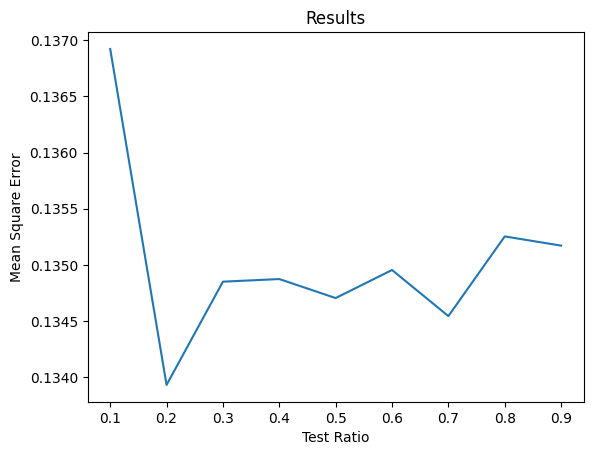

In [23]:
train_and_predict(adult_df, labels)

In [29]:
def k_features(df, labels, k, r):
    X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=r) # split the data
    best_mse = float('inf')
    best_features = None
    for features in combinations(range(X_train.shape[1]), k): # create all possible combinations
        x_train_k = X_train.iloc[:, list(features)] # use the selected features
        x_test_k = X_test.iloc[:, list(features)]
        
        lr = LinearRegression() 
        lr.fit(x_train_k, y_train) # train the model
        
        predicted = lr.predict(x_test_k)
        mse = mean_squared_error(y_pred=predicted, y_true=y_test)
        if mse < best_mse: # check best results
            best_mse = mse
            best_features = features
    return best_mse, best_features

k-naive features

In [39]:
for k in range(2, 4): # check for k=2 and k=3
    results = k_features(adult_df, labels, k, 0.1)
    print(f'k = {k}:')
    print(f'Best MSE: {results[0]}')
    print("Best Features: ", end="")
    for index in results[1]:
        print(adult_df.columns[index], end=" ")
    print()

k = 2
Best MSE: 0.1560085717459128
Best Features: education-num relationship 
k = 3
Best MSE: 0.14654322467418157
Best Features: age education-num sex 
